In [1]:
#Utility
import numpy as np
import pandas as pd

import glob
import time
import os
from math import sqrt
import warnings

#kera for tensorflow support
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

#Data Visuallization
import matplotlib.pyplot as plt

## Datasource folders

In [2]:
YAHOO_DS="/root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0"
DIRS = ['A1Benchmark', 'A2Benchmark','A3Benchmark', 'A4Benchmark']
DATA_FILE_EXTENSION = "*.csv"
warnings.filterwarnings('ignore')

In [3]:
Benchmark_dir  = YAHOO_DS + os.path.sep + DIRS[1] + os.path.sep 
Benchmark_dir

'/root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/'

## Reading Data

In [4]:
def standardize_array(values_to_standardize):
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values_to_standardize)
    standardaized = scaler2.transform(values_to_standardize)
    return standardaized

In [5]:
def read_data_set(file_name_to_read):
    dataset = pd.read_csv(file_name_to_read, usecols=[1])
    dataset = dataset.values
    dataset = dataset.astype('float32')
    standardize_val = standardize_array(dataset[:, [0]])
    dataset[:, [0]] = standardize_val
    return dataset

In [6]:
def split_data_set(dataset, split=0.67):
    train_size = int(len(dataset) * split)
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    return train, test

In [7]:
def look_back_and_create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        dataX.append(a)
        dataY.append(dataset[i])
    #print('Length of input ', len(dataset), '\nShape of input  ', dataset.shape, '\nShape of dataX ', dataX.shape, '\nShape of dataY ', dataY.shape)
    return np.array(dataX), np.array(dataY)

In [8]:
def define_model_and_train(X, Y):
    model = Sequential()
    model.add(Dense(8, input_dim=look_back, activation='relu'))
    #model.add(Dense(10,  activation='relu'))
    #model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    start_millis = int(round(time.time() * 1000))
    model.fit(X, Y, epochs=25, batch_size=1000, verbose=0)
    end_millis = int(round(time.time() * 1000))
    print (f'Time taken to train the model is : {end_millis - start_millis} ms')
    return model

In [9]:
def evaluate_model(model, X, Y):
    trainScore = model.evaluate(X, Y, verbose=0)
    print('Score: %.2f MSE (%.2f RMSE)' % (trainScore, sqrt(trainScore)))

In [10]:
def predict_using_model(model, X):
    return model.predict(X)

In [11]:
def get_train_test_data_from_file(file_name, partition_size = .8, look_back=20):
    print('File Name : ', file_name)
    data_read_from_file = read_data_set(file_name)
    train, test = split_data_set(data_read_from_file, partition_size)
    Xtrain, Ytrain = look_back_and_create_dataset(train, look_back)
    Xtest, Ytest = look_back_and_create_dataset(test, look_back)
    return data_read_from_file, Xtrain, Ytrain, Xtest, Ytest   

In [12]:
def plot_actuals_vs_predictions(all_data, train_predict, test_predict, look_back):
    trainPredictPlot = np.empty_like(all_data)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    
    testPredictPlot = np.empty_like(all_data)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2):len(all_data), :] = test_predict
    

    #Now Plot
    plt.figure(figsize=(40,10))
    plt.plot(testPredictPlot, Label ='Test Prediction')
    plt.plot(trainPredictPlot, Label ='Train Prediction')
    plt.plot(all_data, Label = 'Original Value in data file')
    plt.legend(("Test Prediction", "Train Prediction", "Original Values n Data File"), loc=3)
    plt.show()

In [13]:
def print_model(model) :
    print(model.summary())
    #print(model.weights)

File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 884 ms


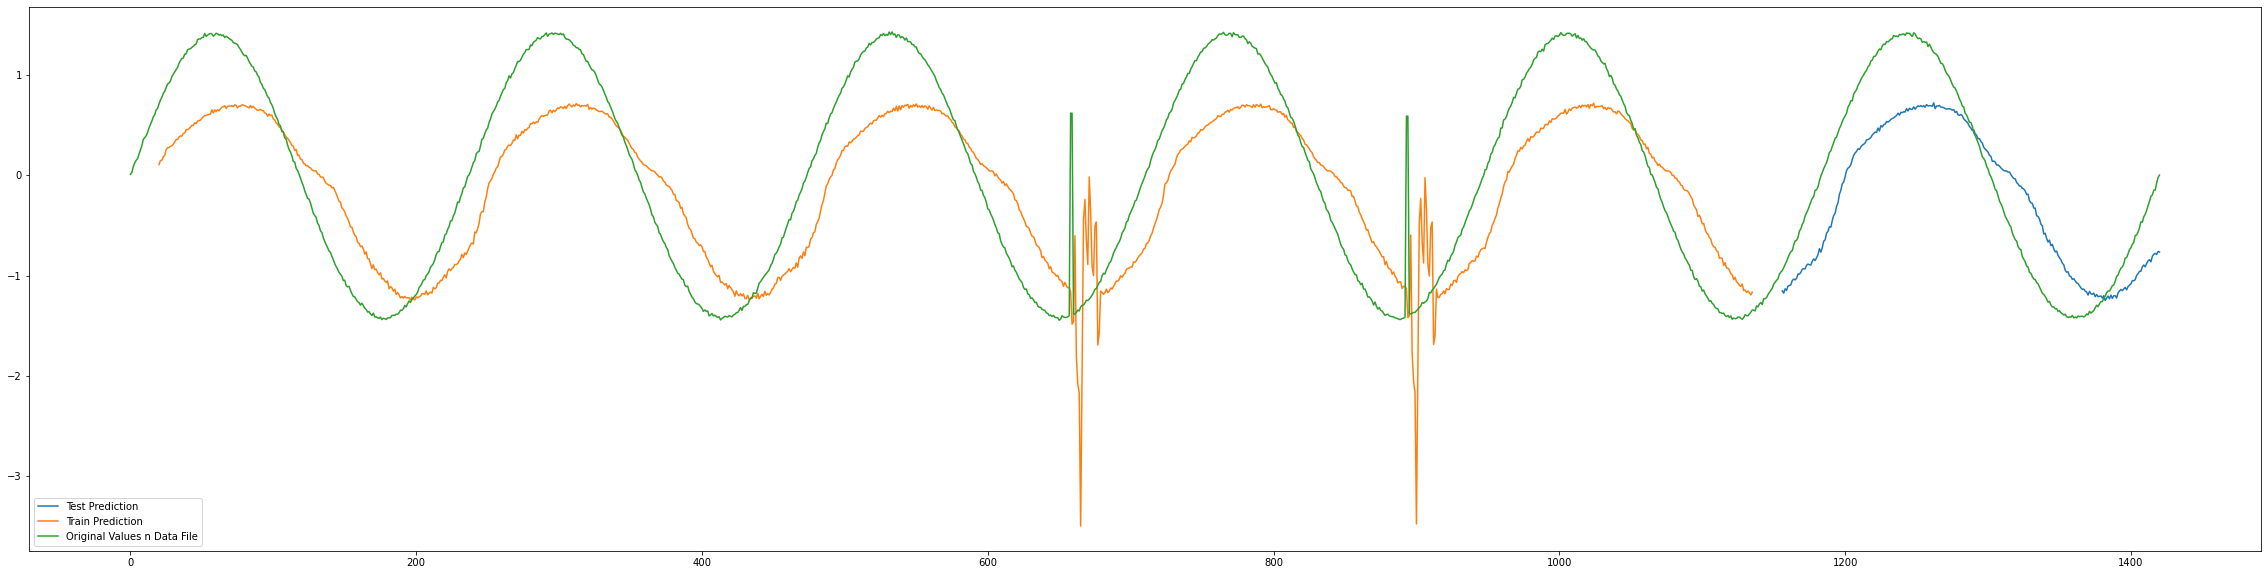

Score: 0.33 MSE (0.57 RMSE)
Score: 0.29 MSE (0.53 RMSE)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 168       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_10.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 474 ms


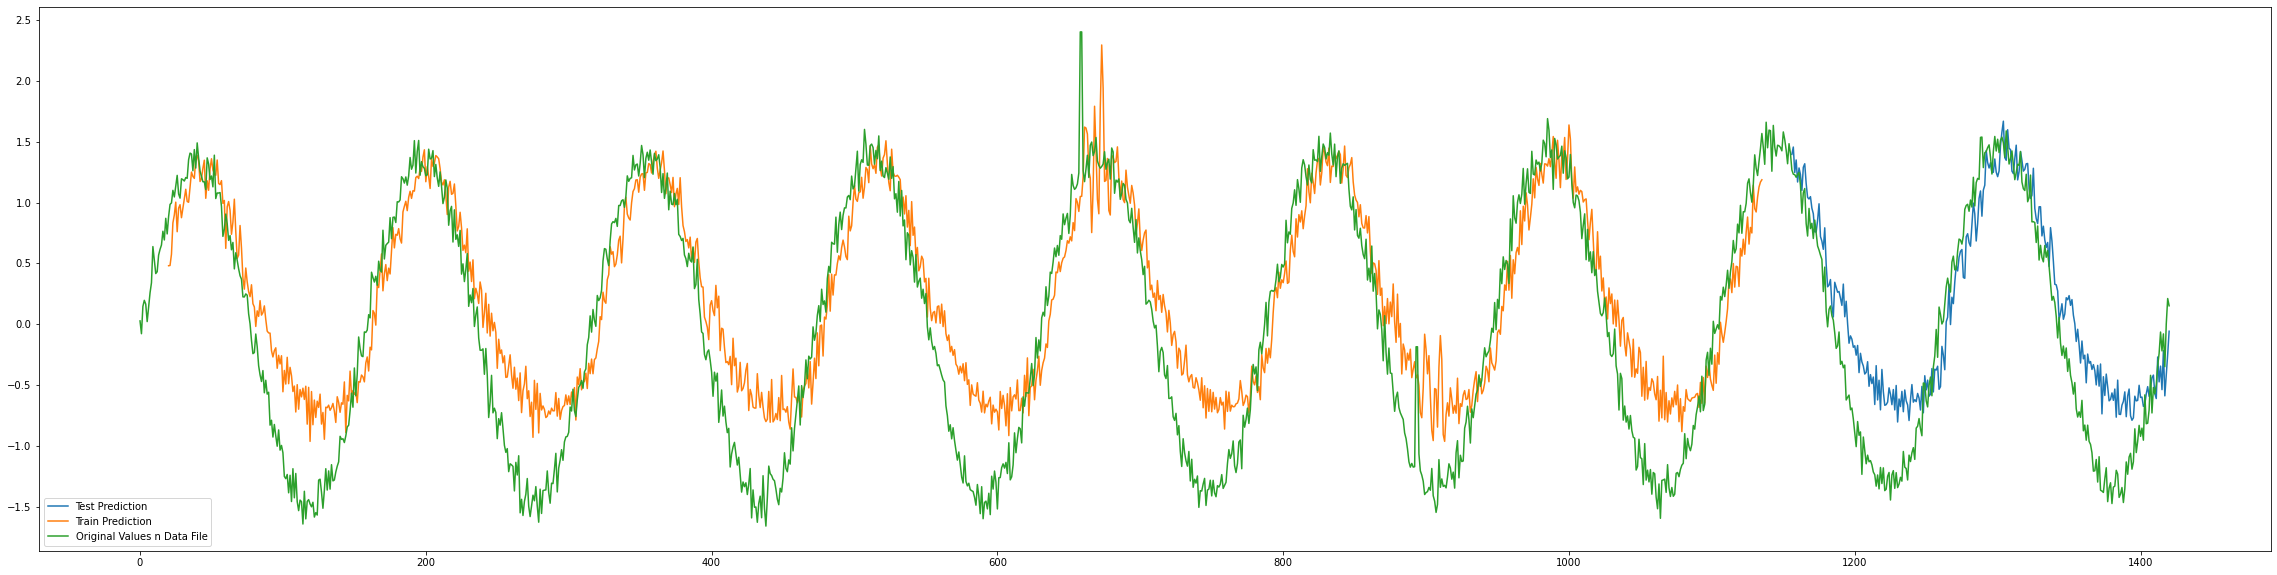

Score: 0.22 MSE (0.47 RMSE)
Score: 0.21 MSE (0.46 RMSE)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_100.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 810 ms


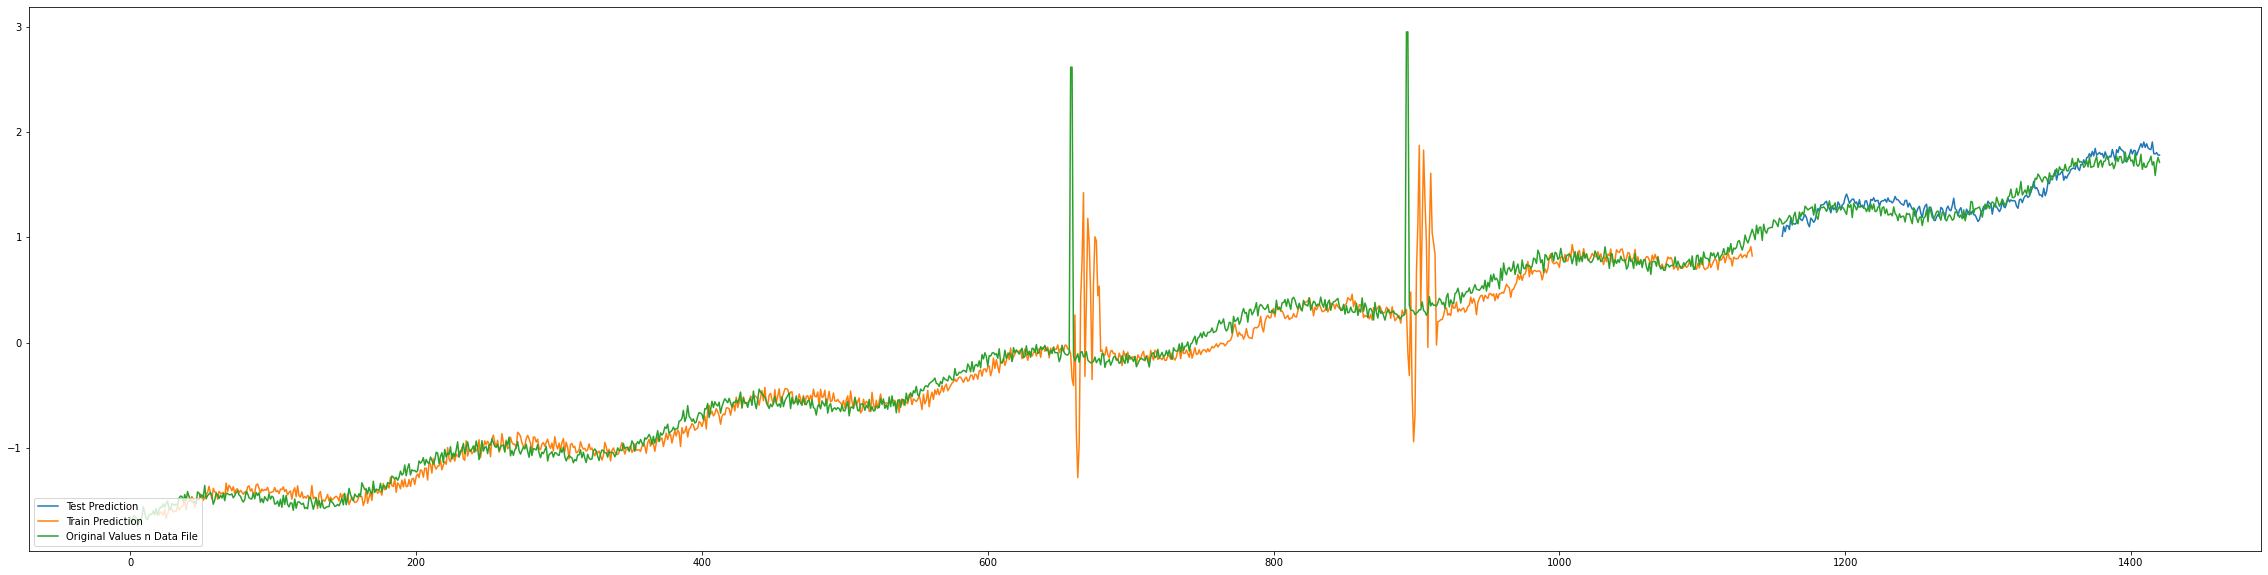

Score: 0.06 MSE (0.25 RMSE)
Score: 0.01 MSE (0.09 RMSE)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_11.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 660 ms


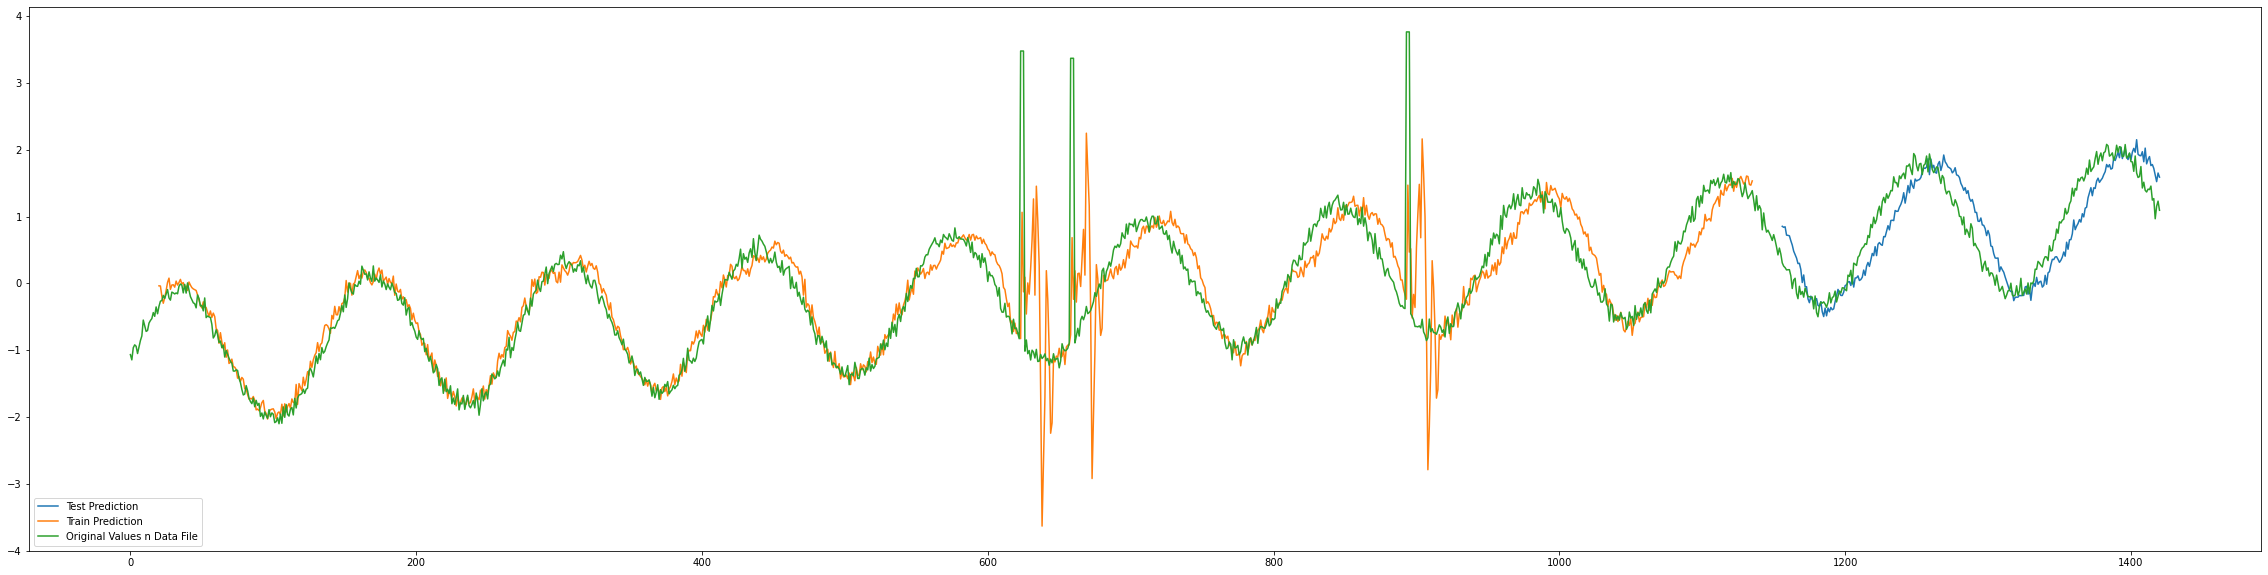

Score: 0.25 MSE (0.50 RMSE)
Score: 0.14 MSE (0.37 RMSE)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_12.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 570 ms


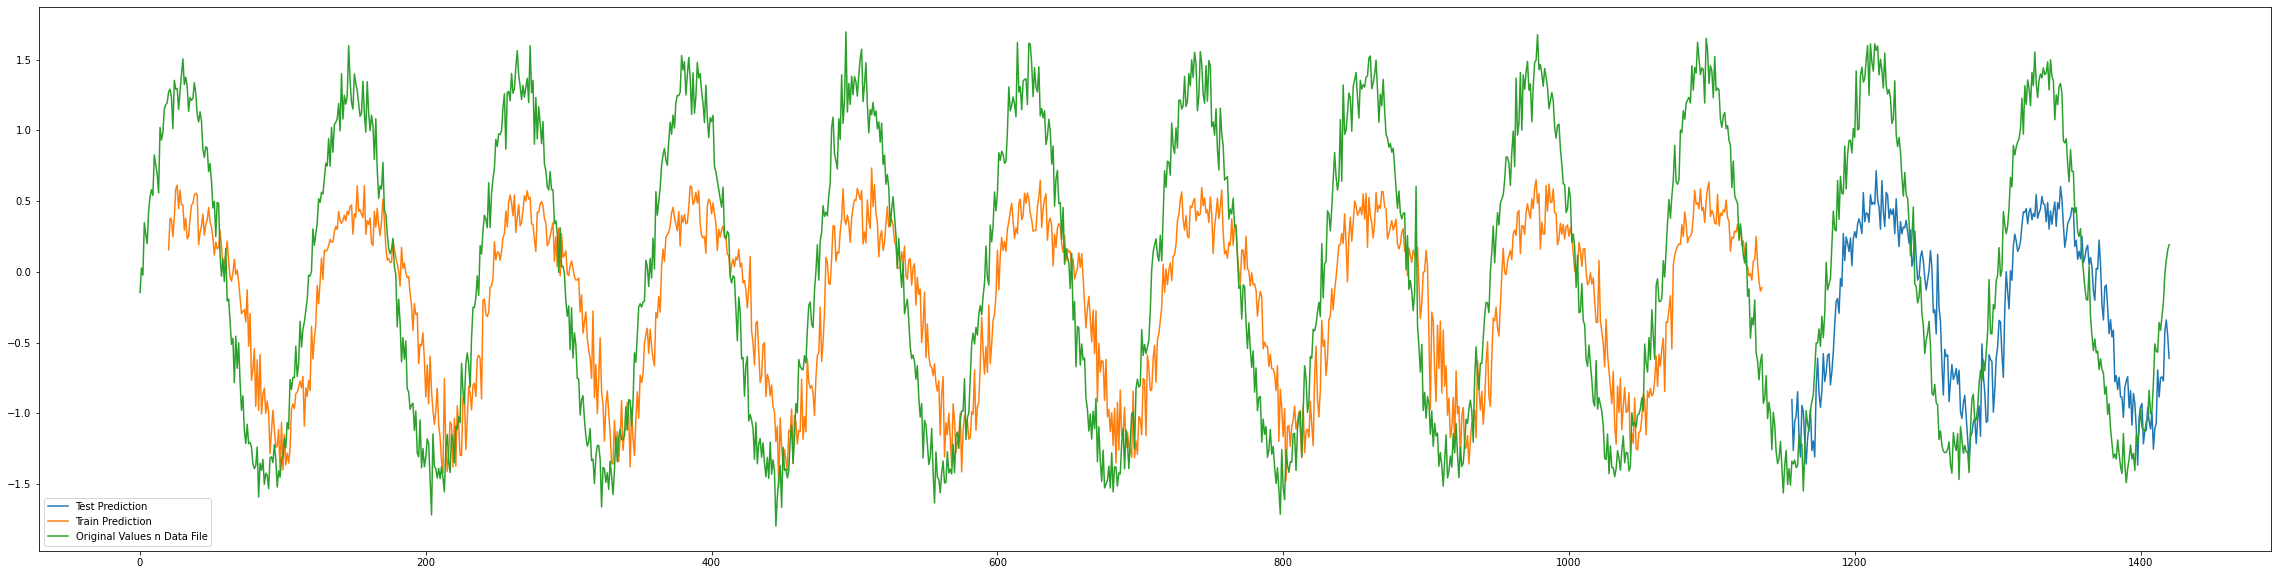

Score: 0.40 MSE (0.63 RMSE)
Score: 0.38 MSE (0.62 RMSE)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_13.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 756 ms


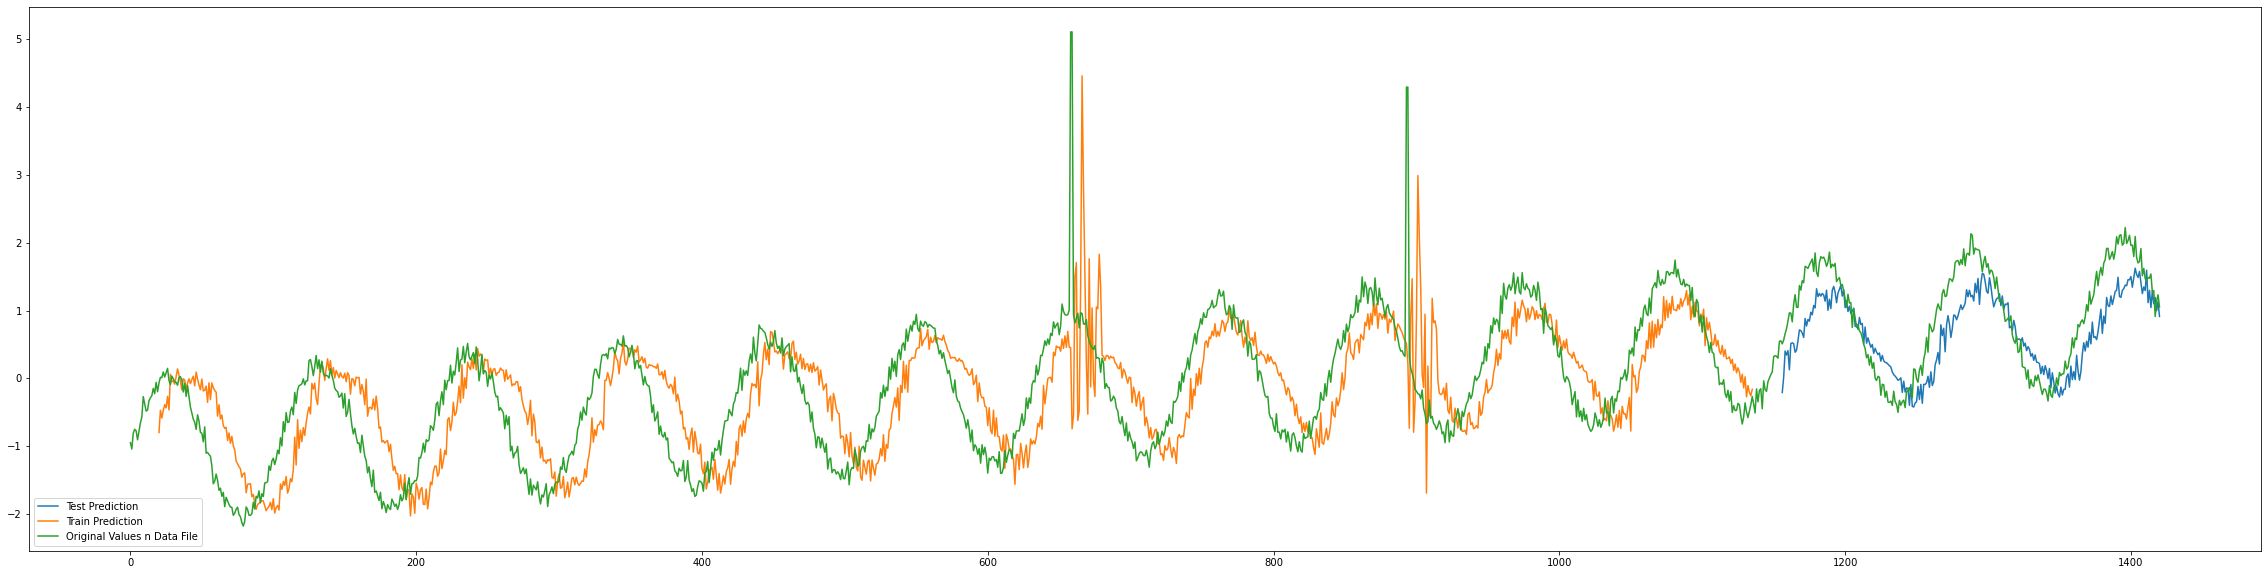

Score: 0.49 MSE (0.70 RMSE)
Score: 0.24 MSE (0.49 RMSE)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_14.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 649 ms


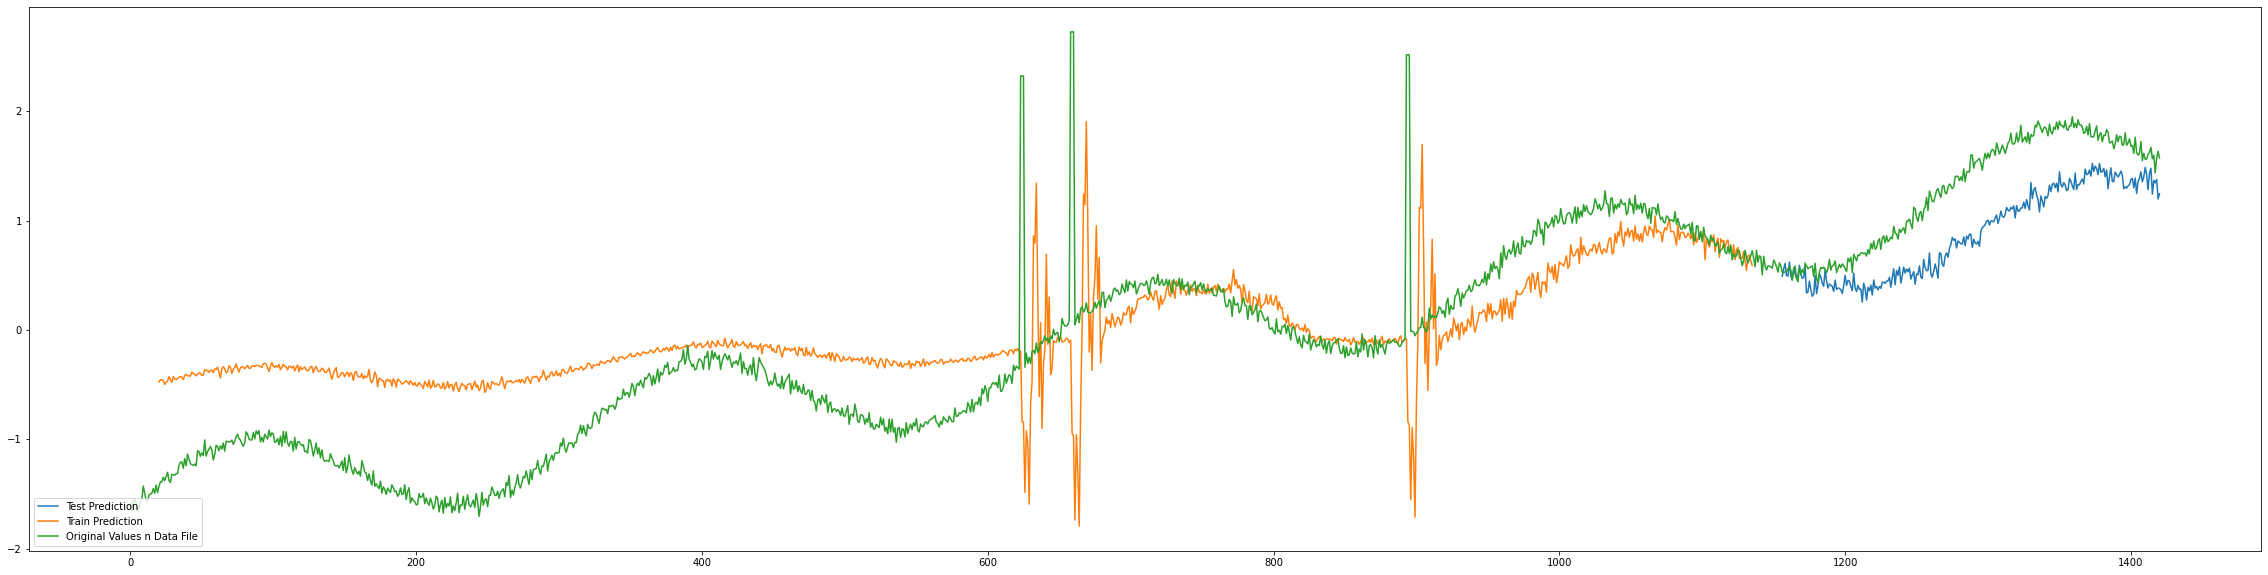

Score: 0.39 MSE (0.62 RMSE)
Score: 0.21 MSE (0.46 RMSE)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_15.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 706 ms


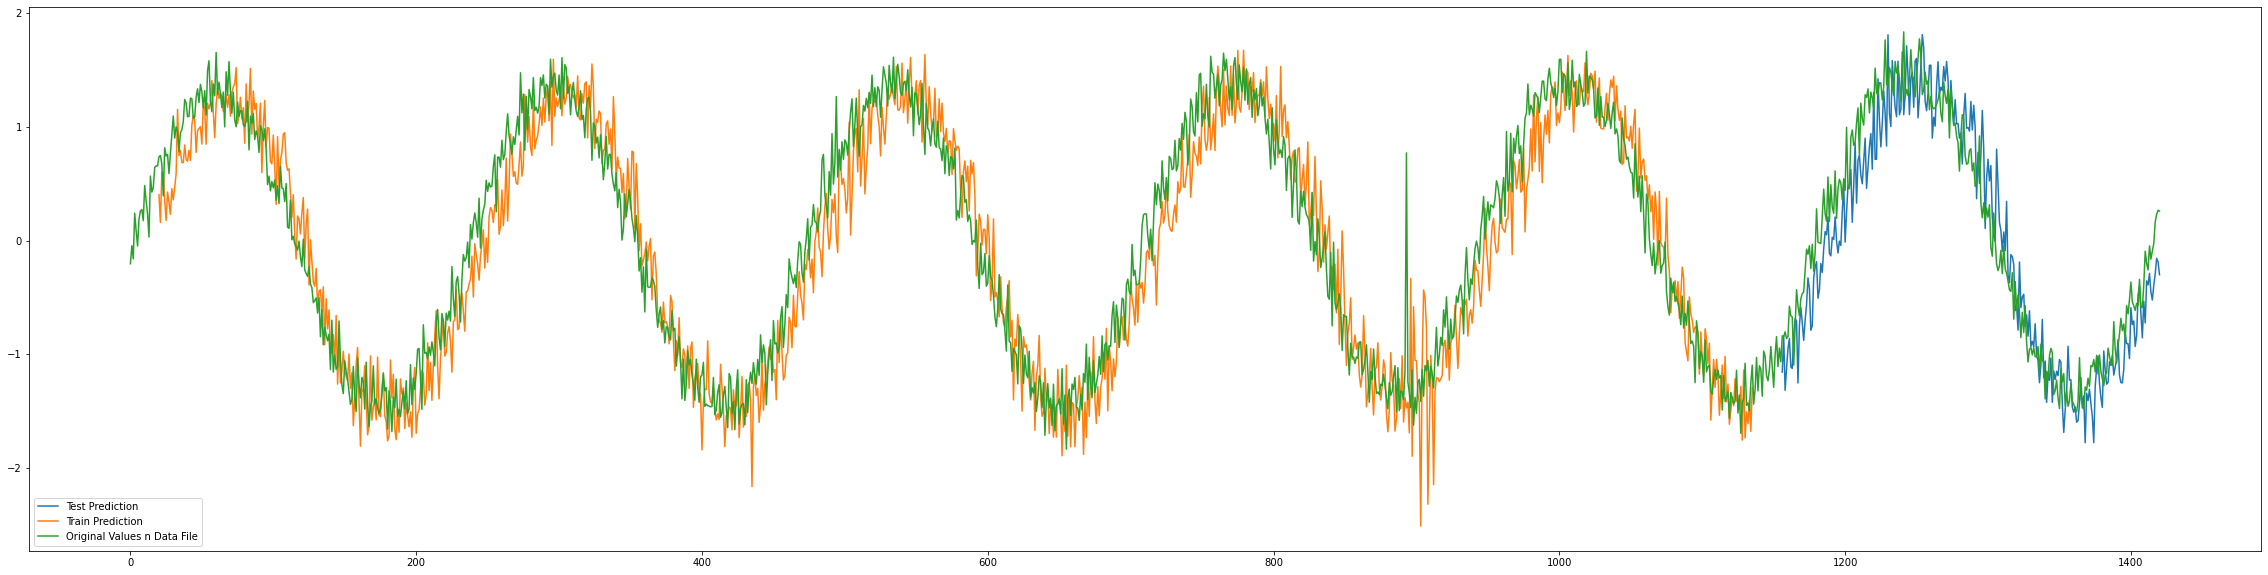

Score: 0.13 MSE (0.35 RMSE)
Score: 0.12 MSE (0.35 RMSE)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_16.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 742 ms


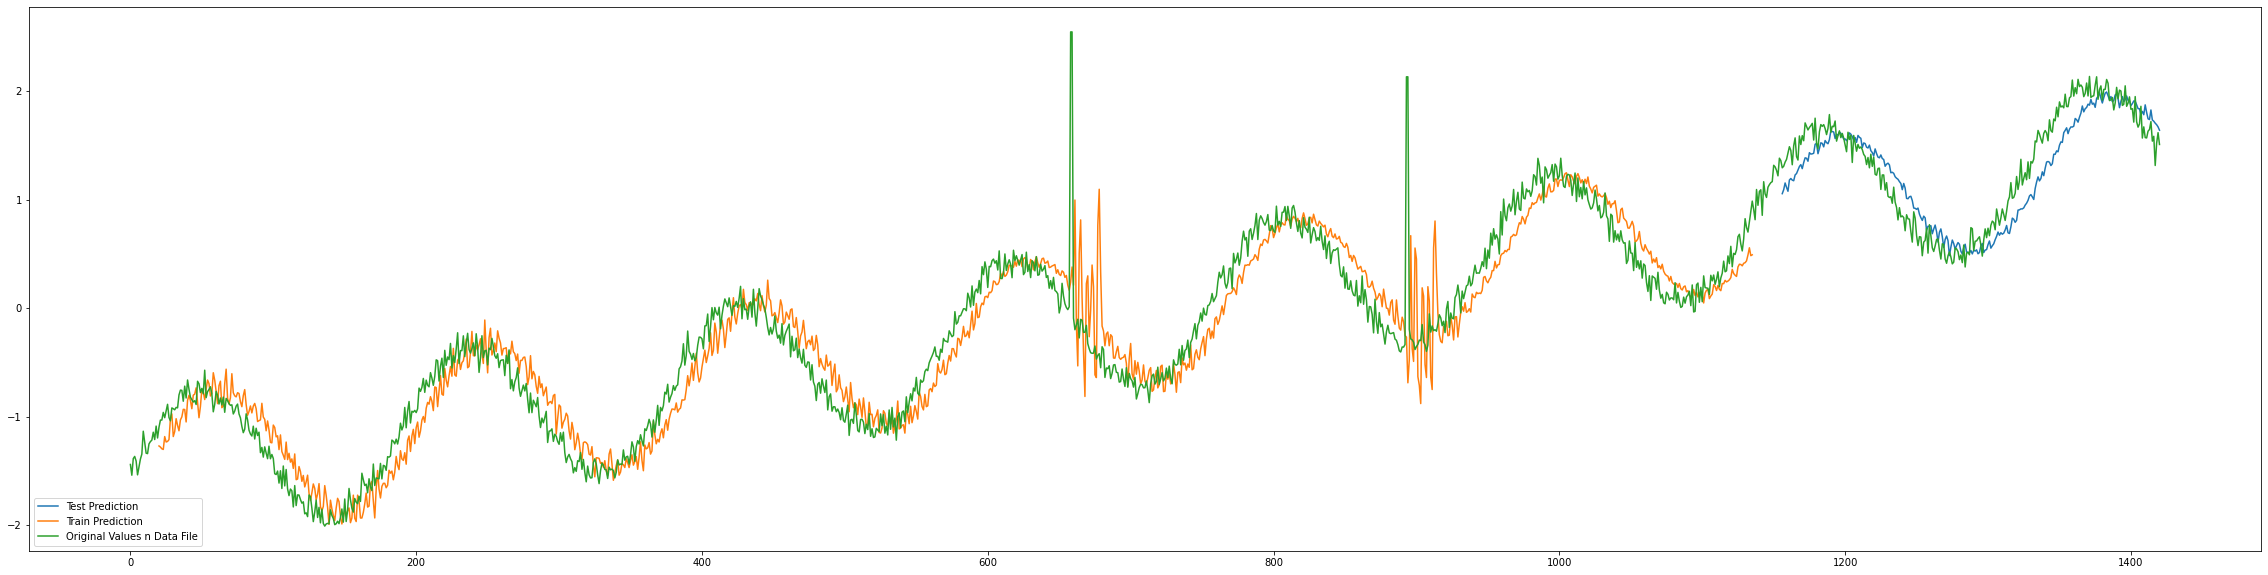

Score: 0.08 MSE (0.28 RMSE)
Score: 0.04 MSE (0.21 RMSE)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
File Name :  /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_17.csv
Shape of Xtrain  (1116, 20) Shape of Ytrain  (1116, 1)
Shape of XTest   (265, 20) Shape of Ytest  (265, 1)
Time taken to train the model is : 850 ms


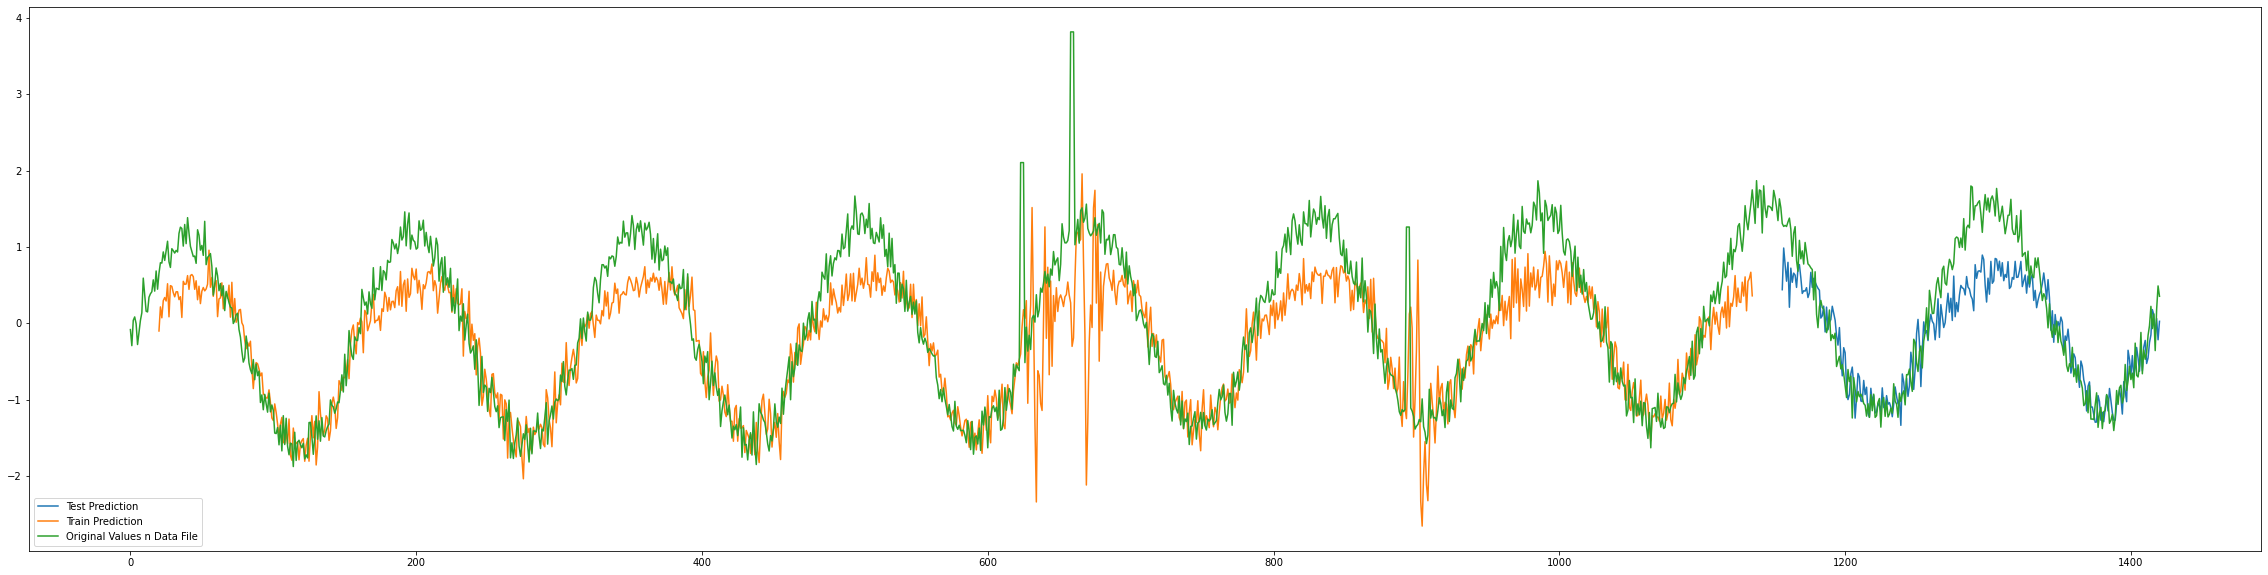

Score: 0.32 MSE (0.57 RMSE)
Score: 0.21 MSE (0.46 RMSE)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
Loaded 10 data files from the location /root/WS/CS-533/TERM-PROJECT/Stochastic-Methods/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/ in 18557 ms


In [14]:
A1 = glob.glob(Benchmark_dir + DATA_FILE_EXTENSION, recursive=True)
partition_size = .8,
look_back=20
start_millis = int(round(time.time() * 1000))
num_files = 0
for data_file in A1:
    all_data, Xtrain, Ytrain, Xtest, Ytest = get_train_test_data_from_file(data_file)
    print('Shape of Xtrain ', Xtrain.shape, 'Shape of Ytrain ', Ytrain.shape)
    print('Shape of XTest  ', Xtest.shape,  'Shape of Ytest ', Ytest.shape)
    #This needs to be removed once, all files are being processed.
    model = define_model_and_train(Xtrain, Ytrain)
    trainPredict = predict_using_model(model, Xtrain)
    testPredict = predict_using_model(model, Xtest)
    plot_actuals_vs_predictions(all_data, trainPredict, testPredict, look_back)
    evaluate_model(model, Xtrain, Ytrain)
    evaluate_model(model, Xtest, Ytest)
    print_model(model)
    
    #Running for 10 files now.  Will change it later.
    num_files +=1
    if num_files == 10 :
        break
end_millis = int(round(time.time() * 1000))
print (f'Loaded {num_files} data files from the location {Benchmark_dir} in {end_millis - start_millis} ms')

####  Applying .8 Threshold to classify

In [15]:
trainPredictThreshold = (trainPredict >= .8).astype(int)
testPredictThreshold = (testPredict > .8).astype(int)
print(np.unique(trainPredictThreshold,  return_counts=True))
print(np.unique(testPredictThreshold, return_counts=True))

(array([0, 1]), array([1092,   24]))
(array([0, 1]), array([255,  10]))
